# Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

Group Facilitator : <br>Name: Abhishek Tiwari <br>
                           Email ID: atul.spider95@gmail.com 
                                            
                           
Team Member Detail: <br>Name: Sujan Polasa<br> 
                                Email ID: sujanpolasa48m@gmail.com 
                                

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Markdown,display,HTML

sns.set_style("whitegrid")

pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
pd.set_option("display.max_colwidth",-1)

#### Load Dataset

In [3]:
data = pd.read_csv("train.csv")

In [4]:
print('shape of Train data :Rows  %s  =========     Columns %s' %(data.shape[0], data.shape[1]))

shape of Train data :Rows  69999  =========     Columns 172


In [5]:
#columns
data.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

#### Load Kaggle Test Data

In [6]:
kaggle_test_data = pd.read_csv("test.csv")

In [7]:
print('shape of kaggle_test_data :Rows  %s  =========     Columns %s' %(kaggle_test_data.shape[0], kaggle_test_data.shape[1]))

shape of kaggle_test_data :Rows  30000  =========     Columns 171


#### Data Dictionary

In [8]:
# data dictionary
data_dict = pd.read_csv("data_dictionary.csv")
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [9]:
#shape
data.shape

(69999, 172)

In [10]:
#info
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [11]:
print("All columns belongs to int / Float , and there date column which is currently in object data type")

All columns belongs to int / Float , and there date column which is currently in object data type


In [12]:
#object dtypes columns
data.select_dtypes(include=["object"]).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

##### Convert Object to Date dtype

In [14]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = pd.to_datetime(data[col])
    kaggle_test_data[col] = pd.to_datetime(kaggle_test_data[col])

In [15]:
#now all converted to datetime.. 
data.select_dtypes(include=["datetime"]).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [16]:
#preprocesing on kaggle_test_data
kaggle_test_data.select_dtypes(include=["datetime"]).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


#### Missing Values

In [19]:
missing_df = pd.DataFrame(data.isnull().sum())
missing_df.rename(columns={0:"Missing_Count"},inplace=True)
missing_df = missing_df[missing_df['Missing_Count'] != 0]
missing_df['Missing_Percentage'] = (missing_df['Missing_Count'] / data.shape[0])*100
missing_df.sort_values(by="Missing_Count",ascending=False)

,Missing_Count,Missing_Percentage
max_rech_data_6,52431,74.902499
fb_user_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
night_pck_user_6,52431,74.902499
count_rech_2g_6,52431,74.902499
total_rech_data_6,52431,74.902499
arpu_2g_6,52431,74.902499
count_rech_3g_6,52431,74.902499
arpu_3g_6,52431,74.902499


In [20]:
print("No of Columns having missing value : %s  out of total Columns %s " % (len(missing_df.index) , data.shape[1]))

No of Columns having missing value : 125  out of total Columns 172 


In [21]:
print("No of Columns having more than 50 percent missing value : %s  out of total Columns %s " % (len(missing_df[missing_df['Missing_Percentage'] >= 50].index) , data.shape[1]))

No of Columns having more than 50 percent missing value : 30  out of total Columns 172 


In [22]:
missing_df[missing_df['Missing_Percentage'] >= 50].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

#### Handling Missing Values

In [23]:
#lets check  recharge related to data columns
# date_of_last_rech_data_6 , max_rech_data_6 , av_rech_amt_data_6

start_time = time.time()

#if max_rech & av_rech_amt_data is missing , it means customer has not recharge for that month so having date_of_last_rech_data_6
#as missing is a correct value 

print("No of Rows having Avg amount of recharge as Zero or Null in 6 Month  ====>>> %s " % data[(data['av_rech_amt_data_6'] == 0) | (data['av_rech_amt_data_6'].isnull())].shape[0])
print("No of Rows having Avg amount of recharge as Zero or Null in 7 Month  ====>>> %s " % data[(data['av_rech_amt_data_7'] == 0) | (data['av_rech_amt_data_7'].isnull())].shape[0])
print("No of Rows having Avg amount of recharge as Zero or Null in 8 Month  ====>>> %s " % data[(data['av_rech_amt_data_8'] == 0) | (data['av_rech_amt_data_8'].isnull())].shape[0])

No of Rows having Avg amount of recharge as Zero or Null in 6 Month  ====>>> 52431 
No of Rows having Avg amount of recharge as Zero or Null in 7 Month  ====>>> 52134 
No of Rows having Avg amount of recharge as Zero or Null in 8 Month  ====>>> 51582 


In [24]:
data['count_rech_2g_6'] = data['count_rech_2g_6'].replace(np.NAN,0)
data['arpu_2g_6'] = data['arpu_2g_6'].replace(np.NAN,0)
data['count_rech_3g_6'] = data['count_rech_3g_6'].replace(np.NAN,0)
data['arpu_3g_6'] = data['arpu_3g_6'].replace(np.NAN,0)
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].replace(np.NAN,0)
data['max_rech_data_6'] = data['max_rech_data_6'].replace(np.NAN,0)
data['total_rech_data_6'] = data['total_rech_data_6'].replace(np.NAN,0)

kaggle_test_data['count_rech_2g_6'] = kaggle_test_data['count_rech_2g_6'].replace(np.NAN,0)
kaggle_test_data['arpu_2g_6'] = kaggle_test_data['arpu_2g_6'].replace(np.NAN,0)
kaggle_test_data['count_rech_3g_6'] = kaggle_test_data['count_rech_3g_6'].replace(np.NAN,0)
kaggle_test_data['arpu_3g_6'] = kaggle_test_data['arpu_3g_6'].replace(np.NAN,0)
kaggle_test_data['av_rech_amt_data_6'] = kaggle_test_data['av_rech_amt_data_6'].replace(np.NAN,0)
kaggle_test_data['max_rech_data_6'] = kaggle_test_data['max_rech_data_6'].replace(np.NAN,0)
kaggle_test_data['total_rech_data_6'] = kaggle_test_data['total_rech_data_6'].replace(np.NAN,0)

In [25]:
data['count_rech_2g_7'] = data['count_rech_2g_7'].replace(np.NAN,0)
data['arpu_2g_7'] = data['arpu_2g_7'].replace(np.NAN,0)
data['count_rech_3g_7']= data['count_rech_3g_7'].replace(np.NAN,0)
data['arpu_3g_7'] = data['arpu_3g_7'].replace(np.NAN,0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].replace(np.NAN,0)
data['max_rech_data_7'] = data['max_rech_data_7'].replace(np.NAN,0)
data['total_rech_data_7'] = data['total_rech_data_7'].replace(np.NAN,0)

kaggle_test_data['count_rech_2g_7'] = kaggle_test_data['count_rech_2g_7'].replace(np.NAN,0)
kaggle_test_data['arpu_2g_7'] = kaggle_test_data['arpu_2g_7'].replace(np.NAN,0)
kaggle_test_data['count_rech_3g_7']= kaggle_test_data['count_rech_3g_7'].replace(np.NAN,0)
kaggle_test_data['arpu_3g_7'] = kaggle_test_data['arpu_3g_7'].replace(np.NAN,0)
kaggle_test_data['av_rech_amt_data_7'] = kaggle_test_data['av_rech_amt_data_7'].replace(np.NAN,0)
kaggle_test_data['max_rech_data_7'] = kaggle_test_data['max_rech_data_7'].replace(np.NAN,0)
kaggle_test_data['total_rech_data_7'] = kaggle_test_data['total_rech_data_7'].replace(np.NAN,0)

In [26]:
data['count_rech_2g_8'] = data['count_rech_2g_8'].replace(np.NAN,0)
data['arpu_2g_8'] = data['arpu_2g_8'].replace(np.NAN,0)
data['count_rech_3g_8'] = data['count_rech_3g_8'].replace(np.NAN,0)
data['arpu_3g_8'] = data['arpu_3g_8'].replace(np.NAN,0)
data['av_rech_amt_data_8']= data['av_rech_amt_data_8'].replace(np.NAN,0)
data['max_rech_data_8'] = data['max_rech_data_8'].replace(np.NAN,0)
data['total_rech_data_8'] = data['total_rech_data_8'].replace(np.NAN,0)

kaggle_test_data['count_rech_2g_8'] = kaggle_test_data['count_rech_2g_8'].replace(np.NAN,0)
kaggle_test_data['arpu_2g_8'] = kaggle_test_data['arpu_2g_8'].replace(np.NAN,0)
kaggle_test_data['count_rech_3g_8'] = kaggle_test_data['count_rech_3g_8'].replace(np.NAN,0)
kaggle_test_data['arpu_3g_8'] = kaggle_test_data['arpu_3g_8'].replace(np.NAN,0)
kaggle_test_data['av_rech_amt_data_8']= kaggle_test_data['av_rech_amt_data_8'].replace(np.NAN,0)
kaggle_test_data['max_rech_data_8'] = kaggle_test_data['max_rech_data_8'].replace(np.NAN,0)
kaggle_test_data['total_rech_data_8'] = kaggle_test_data['total_rech_data_8'].replace(np.NAN,0)

#### Handling the missing valuesfor the attributes count_rech_2g_,count_rech_3g_for month 6,7,8

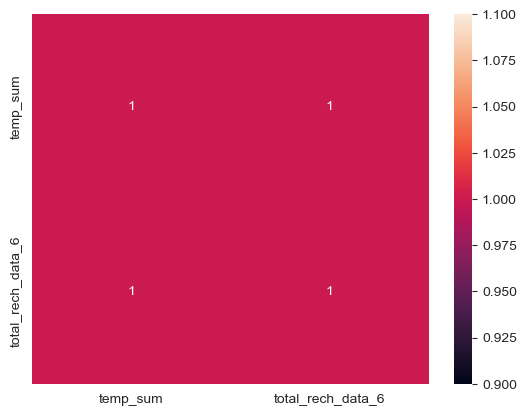

In [27]:
temp_data = data.loc[:,['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']]
temp_data['temp_sum'] = temp_data['count_rech_2g_6'] + temp_data['count_rech_3g_6']
sns.heatmap(temp_data.loc[:,['temp_sum','total_rech_data_6']].corr(),annot=True)

del temp_data

#### will add all the columns that need to be droppedin column_drop[], and will dropthe columns at the end of EDA

In [28]:
column_drop = []

In [29]:
# we can see total_rech_data_6 = count_rech_2g_6 + count_rech_2g_6 , so lets drop count_rech_2g_6 , count_rech_2g_6

column_drop.append(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'])

In [30]:
column_drop

[['count_rech_2g_6',
  'count_rech_3g_6',
  'count_rech_2g_7',
  'count_rech_3g_7',
  'count_rech_2g_8',
  'count_rech_3g_8']]

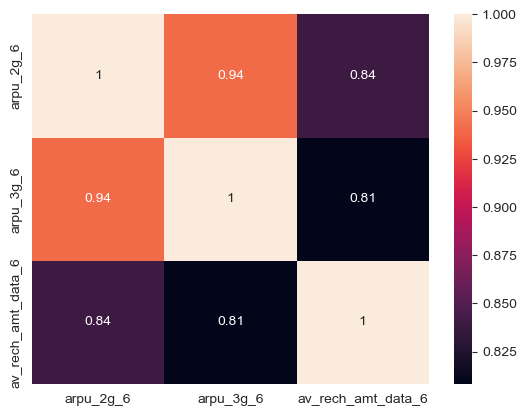

In [31]:
temp_data = data.loc[:,['arpu_2g_6','arpu_3g_6','av_rech_amt_data_6']]
#temp_data['temp_sum'] = temp_data['arpu_2g_6'] + temp_data['arpu_3g_6']
sns.heatmap(temp_data.corr(),annot=True)

del temp_data

In [32]:
# there is a high correlation bettwen arpu_2g_6, arpu_3g_6 to av_rech_amt_data_6
# so will drop the arpu_2g_6 , arpu_3g_6

column_drop.append(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'])

#### Night Pack

In [33]:
data.loc[:,['night_pck_user_6','night_pck_user_7','night_pck_user_8']].isnull().sum()

night_pck_user_6    52431
night_pck_user_7    52134
night_pck_user_8    51582
dtype: int64

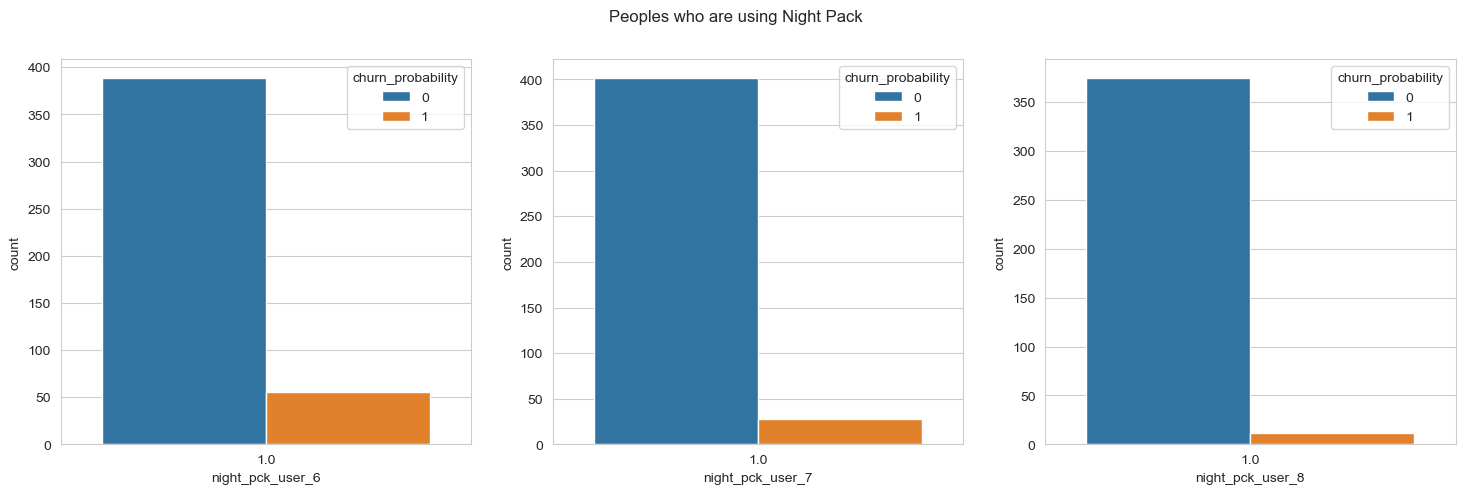

In [34]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x='night_pck_user_6', data= data[data['night_pck_user_6']==1], hue='churn_probability')
plt.subplot(1,3,2)
sns.countplot(x='night_pck_user_7', data= data[data['night_pck_user_7']==1], hue='churn_probability')
plt.subplot(1,3,3)
sns.countplot(x='night_pck_user_8', data= data[data['night_pck_user_8']==1], hue='churn_probability')
plt.suptitle('Peoples who are using Night Pack')
plt.show()

In [35]:
data['night_pck_user_6'].isnull().sum()

52431

In [36]:
#user using night pack have very less number of customer using this as well there is a large no of missing values.. so lets drop it

column_drop.append(['night_pck_user_6','night_pck_user_7','night_pck_user_8'])

#### FB_User

In [37]:
data.loc[:,['fb_user_6','fb_user_7','fb_user_8']].isnull().sum() /data.shape[0]

fb_user_6    0.749025
fb_user_7    0.744782
fb_user_8    0.736896
dtype: float64

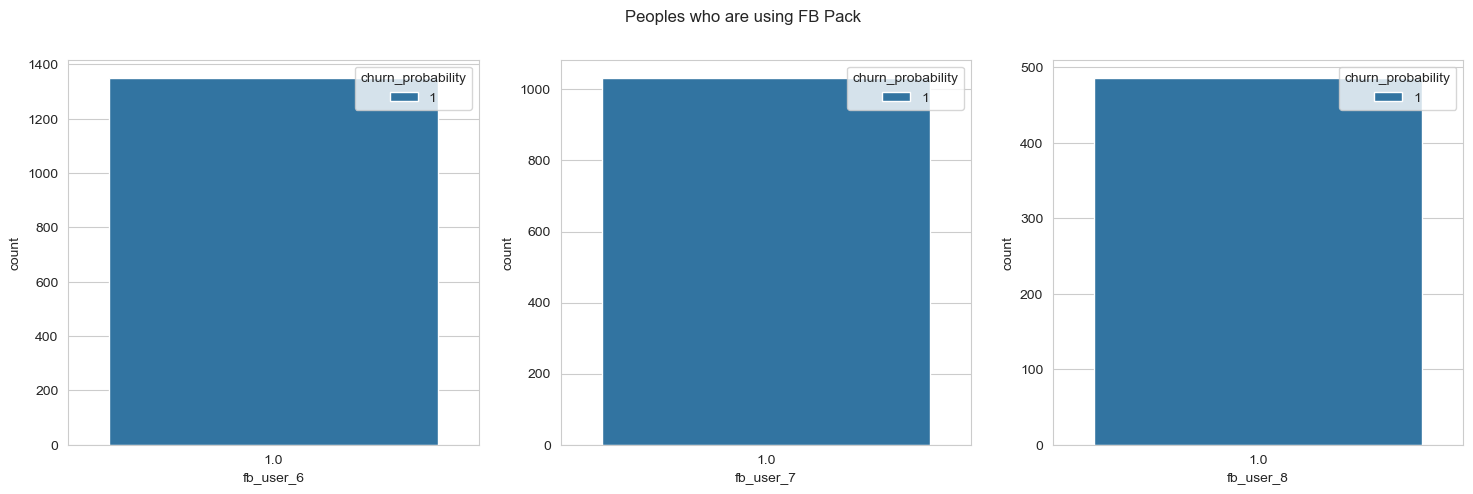

In [38]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x='fb_user_6', data= data[(data['fb_user_6']==1) & (data['churn_probability']==1)], hue='churn_probability')
plt.subplot(1,3,2)
sns.countplot(x='fb_user_7', data= data[(data['fb_user_7']==1) & (data['churn_probability']==1)], hue='churn_probability')
plt.subplot(1,3,3)
sns.countplot(x='fb_user_8', data= data[(data['fb_user_8']==1) & (data['churn_probability']==1)], hue='churn_probability')
plt.suptitle('Peoples who are using FB Pack')
plt.show()

In [39]:
# there is decline trend & but lot of missing value more than 74% data is missing so lets drop it

column_drop.append(['fb_user_6','fb_user_7','fb_user_8'])

#### Recharge related Columns

In [41]:
recharge_col = data.columns[data.columns.str.contains('rech|rch')]

In [42]:
recharge_col


Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

In [43]:
data[recharge_col].isnull().sum()

total_rech_num_6            0    
total_rech_num_7            0    
total_rech_num_8            0    
total_rech_amt_6            0    
total_rech_amt_7            0    
total_rech_amt_8            0    
max_rech_amt_6              0    
max_rech_amt_7              0    
max_rech_amt_8              0    
date_of_last_rech_6         1101 
date_of_last_rech_7         1234 
date_of_last_rech_8         2461 
last_day_rch_amt_6          0    
last_day_rch_amt_7          0    
last_day_rch_amt_8          0    
date_of_last_rech_data_6    52431
date_of_last_rech_data_7    52134
date_of_last_rech_data_8    51582
total_rech_data_6           0    
total_rech_data_7           0    
total_rech_data_8           0    
max_rech_data_6             0    
max_rech_data_7             0    
max_rech_data_8             0    
count_rech_2g_6             0    
count_rech_2g_7             0    
count_rech_2g_8             0    
count_rech_3g_6             0    
count_rech_3g_7             0    
count_rech_3g_

#### will drop date columns : date_of_last_rech_ & date_of_last_rech_data_

In [44]:
column_drop.append(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'])

In [45]:
column_drop.append(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])

#### Unique Values : Filter columns having all values as unique ( High Variance ) & with just one value ( No variance)

In [46]:
unique_data = pd.DataFrame(data.nunique(axis=0,dropna=True))
unique_data.rename(columns={0:"Unique_Count"},inplace=True)
unique_data = unique_data[(unique_data['Unique_Count']==1) | (unique_data['Unique_Count']==data.shape[0])]
unique_data
#del unique_data

,Unique_Count
id,69999
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
last_date_of_month_6,1
last_date_of_month_7,1
last_date_of_month_8,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1


In [48]:
#unique_data columns values
data[unique_data.index].head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
2,2,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
3,3,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
4,4,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
5,5,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
6,6,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
7,7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
8,8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
9,9,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#will drop these columns as there is no variance or very high variance
column_drop.append(unique_data.index)

#delete unique_data
del unique_data

Filtering the High Value Customer Based on Revenue

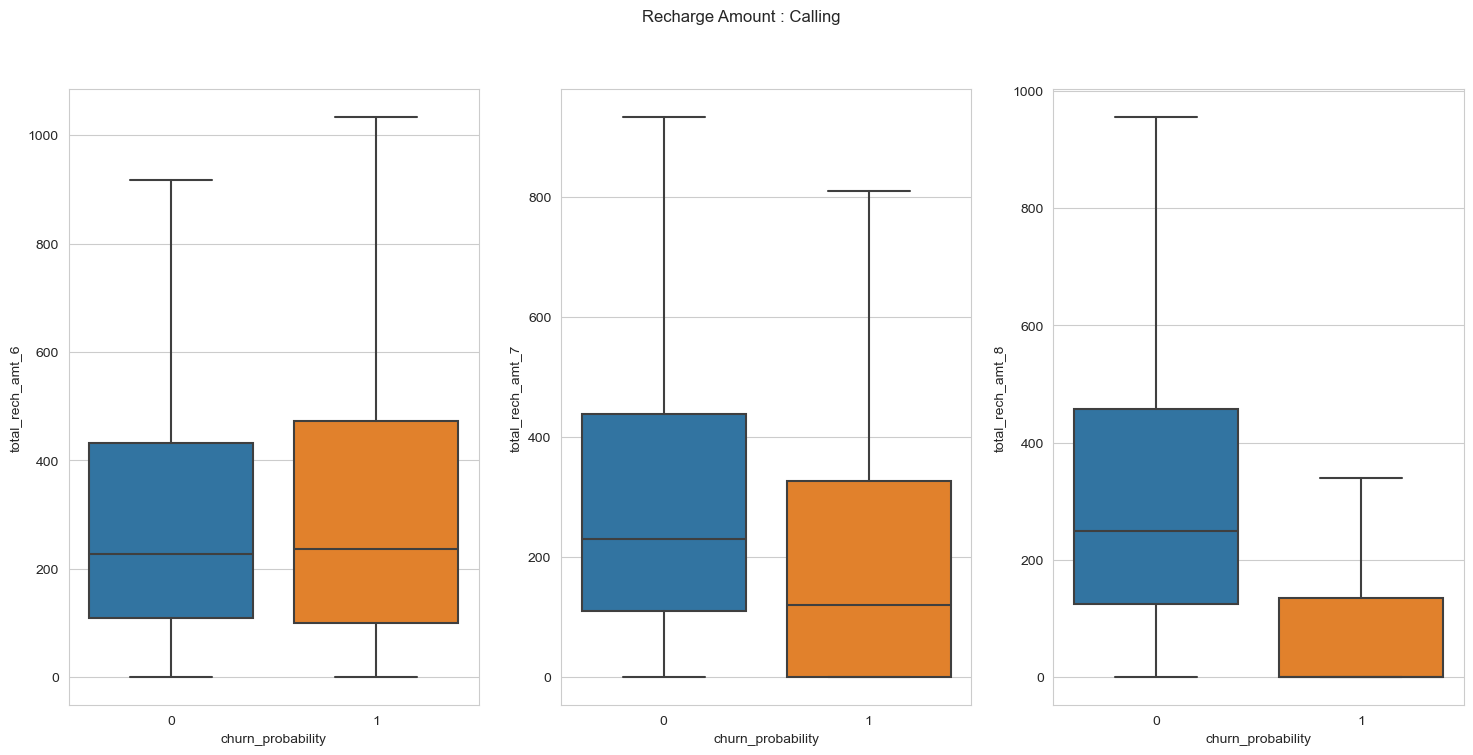

In [50]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(data=data,y='total_rech_amt_6',x='churn_probability',showfliers=False)
plt.subplot(1,3,2)
sns.boxplot(data=data,y='total_rech_amt_7',x='churn_probability',showfliers=False)
plt.subplot(1,3,3)
sns.boxplot(data=data,y='total_rech_amt_8',x='churn_probability',showfliers=False)
plt.suptitle("Recharge Amount : Calling ")
plt.show()

#### Analysis : There is trend of decline in Recharge Amount For Churn Customer

##### As well we can see that median lies aroud 200 amount so larger no of people are reacharing for less amount, so we need to filter the high value customer who are recharging for high amount

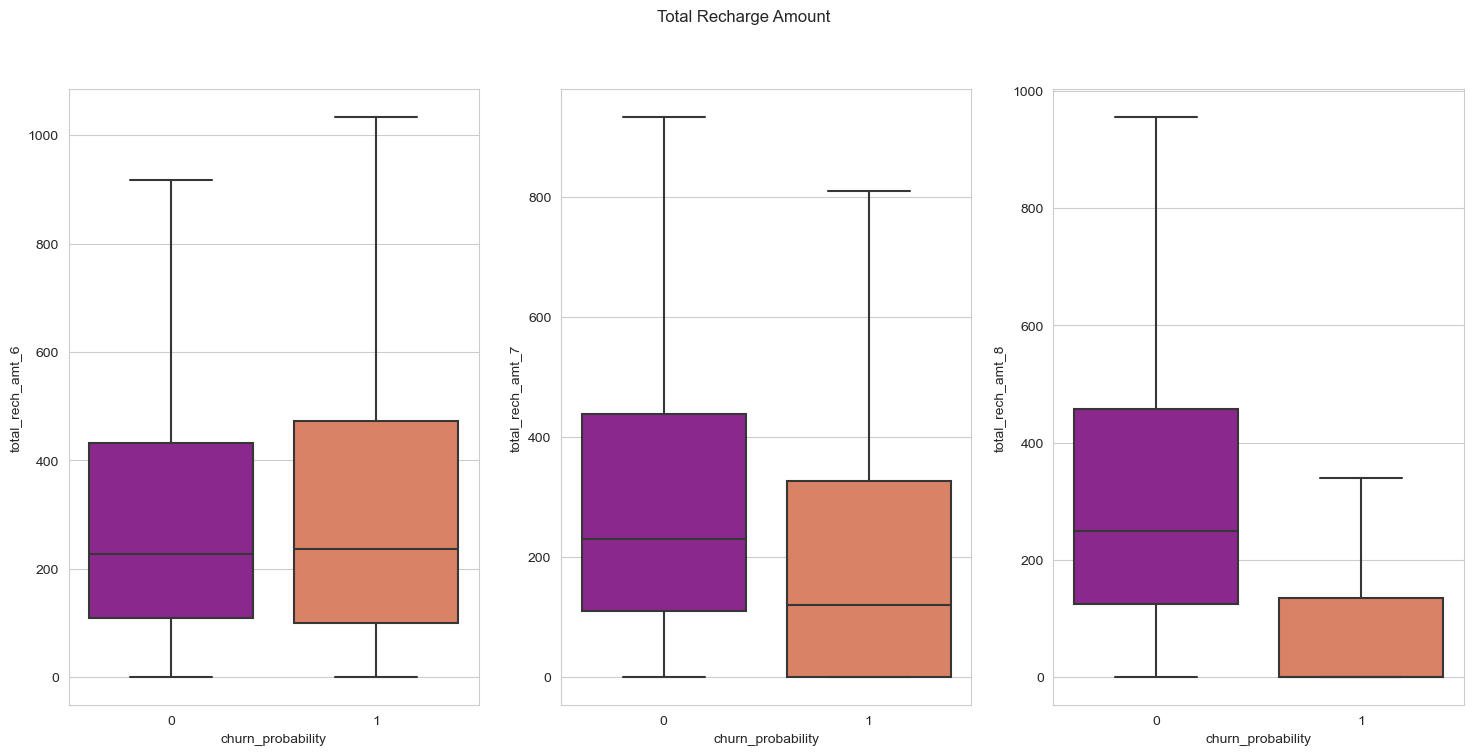

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(y='total_rech_amt_6',data=data,x='churn_probability',showfliers=False, palette=("plasma"))
plt.subplot(1,3,2)
sns.boxplot(y='total_rech_amt_7',data=data,x='churn_probability',showfliers=False, palette=("plasma"))
plt.subplot(1,3,3)
sns.boxplot(y='total_rech_amt_8',data=data,x='churn_probability',showfliers=False , palette=("plasma"))
plt.suptitle("Total Recharge Amount")
plt.show()

##### Analysis : There is trend of decline in Recharge Number as well For Churn Customer

##### Derived Columns : Total Recharge Amount for Data

In [52]:
# total_rech_data_6 is sum of count of recharge number done for 3g & 2g
# av_rech_amt_data_6 : average recharge amount done for user in a month
data['total_rech_amt_data_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_rech_amt_data_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_rech_amt_data_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']


kaggle_test_data['total_rech_amt_data_6'] = kaggle_test_data['total_rech_data_6'] * kaggle_test_data['av_rech_amt_data_6']
kaggle_test_data['total_rech_amt_data_7'] = kaggle_test_data['total_rech_data_7'] * kaggle_test_data['av_rech_amt_data_7']
kaggle_test_data['total_rech_amt_data_8'] = kaggle_test_data['total_rech_data_8'] * kaggle_test_data['av_rech_amt_data_8']

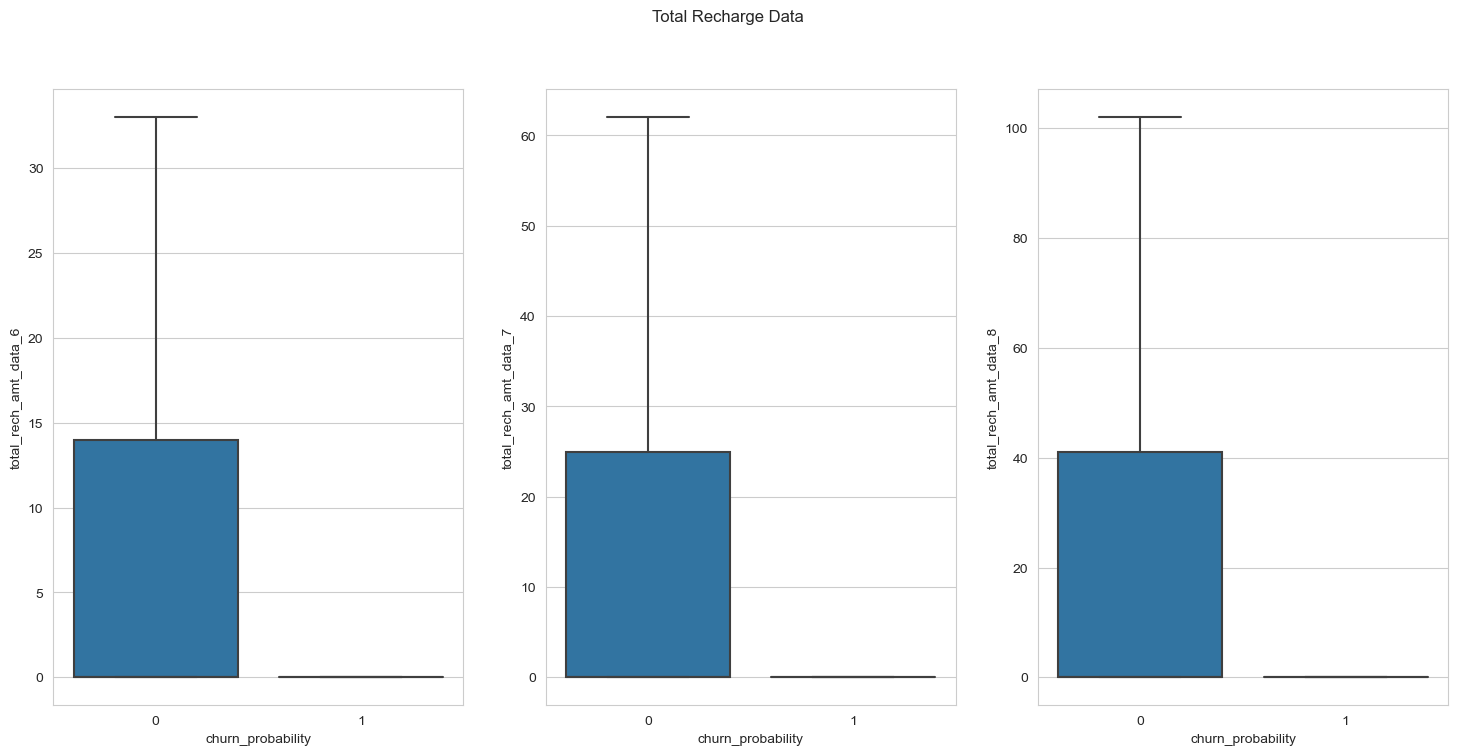

In [53]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(y='total_rech_amt_data_6',data=data,x='churn_probability',showfliers=False)
plt.subplot(1,3,2)
sns.boxplot(y='total_rech_amt_data_7',data=data,x='churn_probability',showfliers=False)
plt.subplot(1,3,3)
sns.boxplot(y='total_rech_amt_data_8',data=data,x='churn_probability',showfliers=False)
plt.suptitle("Total Recharge Data")
plt.show()

##### Majority of Customer ( churn Customer) are not recharging for the Data

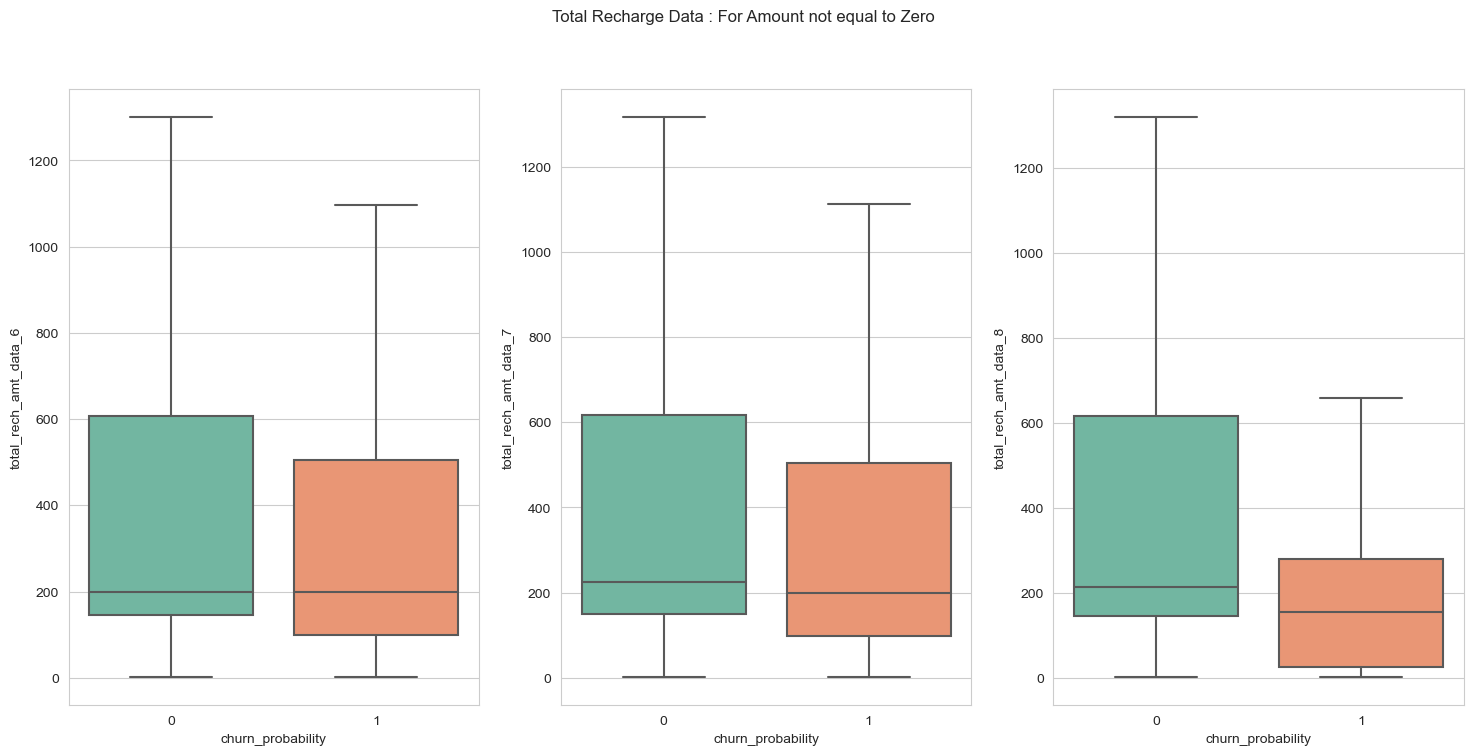

In [54]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.boxplot(y='total_rech_amt_data_6',data=data[data['total_rech_amt_data_6']!=0],x='churn_probability',showfliers=False,palette=("Set2"))
plt.subplot(1,3,2)
sns.boxplot(y='total_rech_amt_data_7',data=data[data['total_rech_amt_data_7']!=0],x='churn_probability',showfliers=False,palette=("Set2"))
plt.subplot(1,3,3)
sns.boxplot(y='total_rech_amt_data_8',data=data[data['total_rech_amt_data_8']!=0],x='churn_probability',showfliers=False,palette=("Set2"))
plt.suptitle("Total Recharge Data : For Amount not equal to Zero")
plt.show()

##### Majority of churn customer are not recharing for data , and those who are doing the recharge there is a trend of decline there as well.

#### We will drop the columns total_rech_data_&av_rech_amt_data_ as we have a derived column i.e. total_rech_amt_data_

In [55]:
column_drop.append(['total_rech_data_6','av_rech_amt_data_6'])
column_drop.append(['total_rech_data_7','av_rech_amt_data_7'])
column_drop.append(['total_rech_data_8','av_rech_amt_data_8'])

#### Derived Column : avg_rech_amt_6_7 based on calc of total recharge of data & call in 6 & 7 month, as these month where customer is in good Phase, 8 month we have to take as Action Phase Month

In [56]:
data['avg_rech_amt_6_7'] = ((data['total_rech_amt_6'] + data['total_rech_amt_data_6']) + 
                            (data['total_rech_amt_7'] + data['total_rech_amt_data_7'])) / 2


kaggle_test_data['avg_rech_amt_6_7'] = ((kaggle_test_data['total_rech_amt_6'] + kaggle_test_data['total_rech_amt_data_6']) + 
                            (kaggle_test_data['total_rech_amt_7'] + kaggle_test_data['total_rech_amt_data_7'])) / 2

#### We will drop the columns total_rech_amt_6, total_rech_amt_7, total_rech_amt_data_6 & total_rech_amt_data_7 as we have  a derived column i.e.avg_rech_amt_6_7

In [57]:
column_drop.append(['total_rech_amt_6','total_rech_amt_7'])
column_drop.append(['total_rech_amt_data_6','total_rech_amt_data_7'])

In [58]:
data['avg_rech_amt_6_7'].describe()

count    69999.000000
mean     485.760093  
std      861.075228  
min      0.000000    
25%      128.000000  
50%      275.500000  
75%      553.000000  
max      37762.500000
Name: avg_rech_amt_6_7, dtype: float64

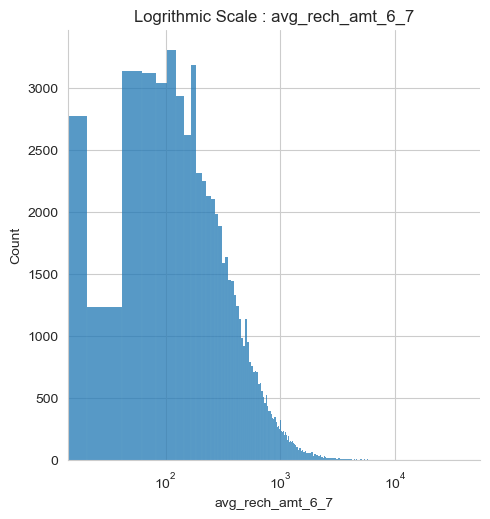

In [59]:
sns.displot(data['avg_rech_amt_6_7'])
plt.xscale('log')
plt.title("Logrithmic Scale : avg_rech_amt_6_7")
plt.show()

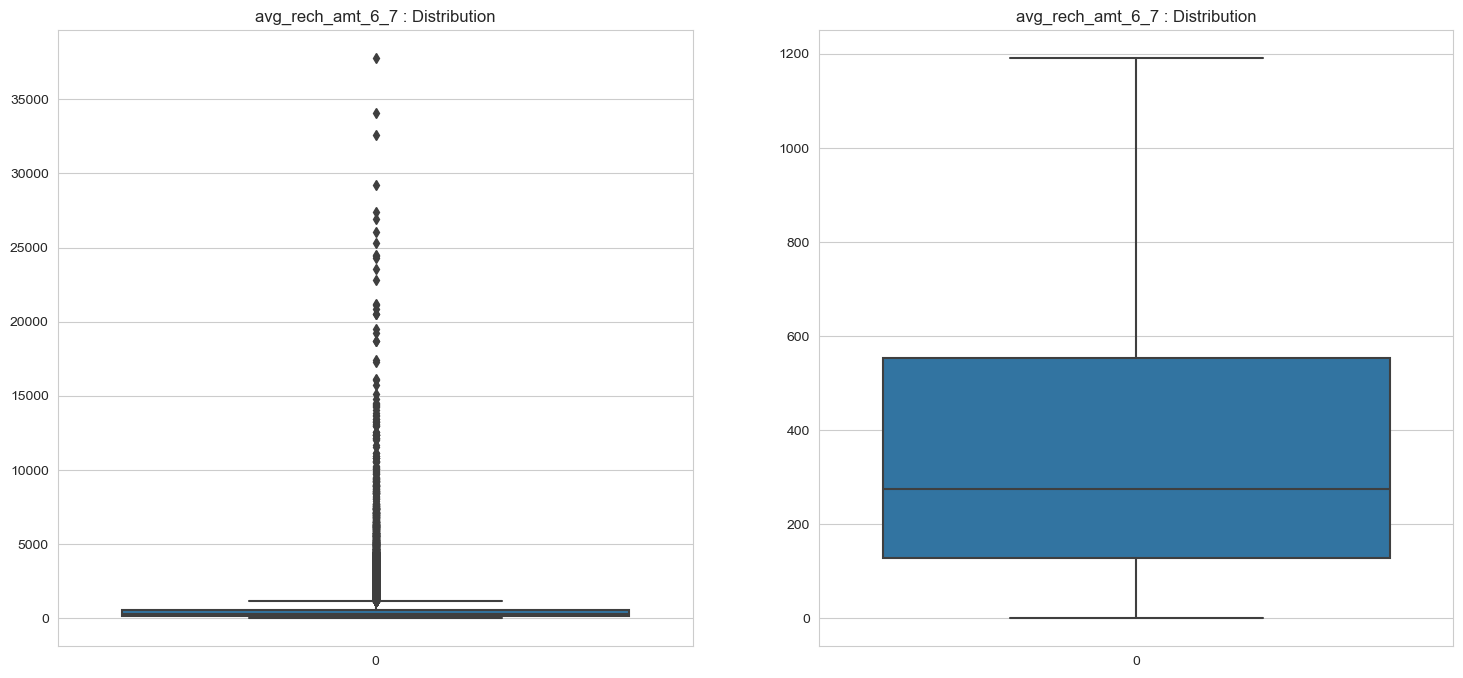

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.boxplot(data=data['avg_rech_amt_6_7'])
plt.title("avg_rech_amt_6_7 : Distribution")
plt.subplot(1,2,2)
sns.boxplot(data=data['avg_rech_amt_6_7'],showfliers=False)
plt.title("avg_rech_amt_6_7 : Distribution")
plt.show()

#### Will drop the total_rech_amt_6, total_rech_amt_7 and Filtering the data to the top 30% considered as High Value customer

In [61]:
cut_off = data['avg_rech_amt_6_7'].quantile(.70)
cut_off

477.5

In [62]:
high_value_cust_data = data[data['avg_rech_amt_6_7'] >= cut_off]
high_value_cust_data.shape

(21013, 176)

In [63]:
data.shape

(69999, 176)

In [64]:
low_cnt = (data.shape[0]-high_value_cust_data.shape[0])/data.shape[0]
low_cnt

0.6998099972856755

In [65]:
high_cnt = (high_value_cust_data.shape[0])/data.shape[0]
high_cnt

0.3001900027143245

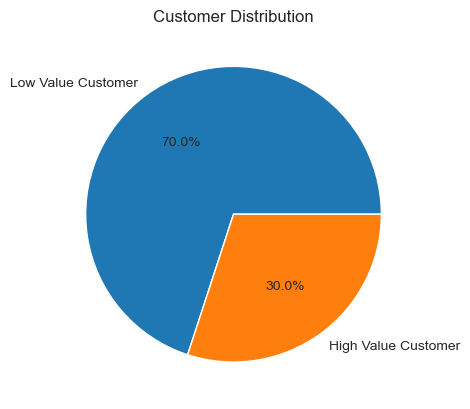

In [66]:
ax = plt.pie([low_cnt,high_cnt],autopct='%1.1f%%',labels=['Low Value Customer','High Value Customer'])
plt.title('Customer Distribution')
plt.show()

In [67]:
del low_cnt
del high_cnt

Drop the columns decided to drop: column_drop[]

In [68]:
column_drop

[['count_rech_2g_6',
  'count_rech_3g_6',
  'count_rech_2g_7',
  'count_rech_3g_7',
  'count_rech_2g_8',
  'count_rech_3g_8'],
 ['arpu_3g_6',
  'arpu_2g_6',
  'arpu_3g_7',
  'arpu_2g_7',
  'arpu_3g_8',
  'arpu_2g_8'],
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'],
 ['fb_user_6', 'fb_user_7', 'fb_user_8'],
 ['date_of_last_rech_data_6',
  'date_of_last_rech_data_7',
  'date_of_last_rech_data_8'],
 ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
        'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
       dtype='object'),
 ['total_rech_data_6', 'av_rech_amt_data_6'],
 ['total_rech_data_7', 'av_rech_amt_data_7'],
 ['total_rech_data_8', 'av_rech_amt_data_8'],
 ['total_rech_amt_6', 'total_rech_amt_7'],
 ['total_re

In [69]:
#drop columns
final_col_drop_list = []
for col_list in column_drop:
    for col in col_list:
        if col not in final_col_drop_list:
            final_col_drop_list.append(col)
del column_drop

In [70]:
len(final_col_drop_list)

48

In [71]:
print(final_col_drop_list)

['count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_8', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7', 'total_rech_data_8', 'av_rech_amt_data_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_data_6', 'total_rech_amt_data_7']


48 Columns we have decided to drop

In [72]:
high_value_cust_data.drop(columns=final_col_drop_list,inplace=True)

kaggle_test_data.drop(columns=final_col_drop_list,inplace=True)

In [73]:
high_value_cust_data.shape

(21013, 128)

#### Recheck the Missing Value now in High Value Customer Data

In [74]:
high_value_cust_data.isnull().sum().sort_values(ascending=False)

isd_og_mou_8             822
std_ic_t2m_mou_8         822
std_ic_t2f_mou_8         822
std_og_t2f_mou_8         822
std_og_t2t_mou_8         822
loc_ic_t2f_mou_8         822
loc_og_mou_8             822
std_ic_mou_8             822
loc_og_t2c_mou_8         822
std_og_mou_8             822
loc_og_t2f_mou_8         822
loc_ic_mou_8             822
loc_og_t2m_mou_8         822
spl_ic_mou_8             822
loc_og_t2t_mou_8         822
std_og_t2m_mou_8         822
offnet_mou_8             822
og_others_8              822
ic_others_8              822
loc_ic_t2m_mou_8         822
spl_og_mou_8             822
std_ic_t2t_mou_8         822
roam_ic_mou_8            822
isd_ic_mou_8             822
onnet_mou_8              822
roam_og_mou_8            822
loc_ic_t2t_mou_8         822
std_ic_t2m_mou_6         397
std_og_mou_6             397
spl_og_mou_6             397
loc_ic_t2m_mou_6         397
og_others_6              397
isd_og_mou_6             397
std_ic_t2f_mou_6         397
std_og_t2f_mou

#### Select Int/Float columns

In [75]:
num_col = list(high_value_cust_data.select_dtypes(include=["int","float"]).columns)
num_col.remove('churn_probability')

#### Scaling: MinMaxScaler for Imputation using KNN Imputer

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
high_value_cust_data[num_col] = scaler.fit_transform(high_value_cust_data[num_col])

kaggle_test_data[num_col] = scaler.transform(kaggle_test_data[num_col])

In [81]:
high_value_cust_data.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_8,avg_rech_amt_6_7
4,0.083342,0.038915,0.030368,0.002885,0.000592,0.000570,0.006815,0.005410,0.000687,0.020526,0.0,0.0,0.004167,0.0,0.0,0.001580,0.000653,0.000570,0.007822,0.004362,0.000929,0.019414,0.001509,0.008516,0.0,0.017289,0.000000,0.005535,0.003380,0.001428,0.0,0.0,0.0,0.000523,0.000000,0.00000,0.0,0.0,0.000000,0.000516,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.01343,0.000000,0.000000,0.0,0.0,0.005927,0.005182,0.001122,0.001247,0.000243,0.000664,0.002377,0.001075,0.004197,0.004013,0.001831,0.003865,0.002889,0.001447,0.005336,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.002792,0.001258,0.004667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.076471,0.072464,0.057971,0.002692,0.012469,0.012428,0.006743,0.006234,0.003226,0.006743,0.016077,0.026367,0.016077,0.037994,0.039231,0.019201,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.166667,0.125000,0.136364,0.0,0.0,0.0000,0.0,0.030303,0.00000,0.112775,0.000000,0.000000,0.000000,0,0.009562,0.027263
15,0.094674,0.045752,0.037232,0.001414,0.003063,0.018082,0.037921,0.048522,0.014070,0.000000,0.0,0.0,0.000000,0.0,0.0,0.001622,0.003377,0.018082,0.066803,0.072607,0.037466,0.005279,0.013381,0.008397,0.0,0.000000,0.000000,0.030767,0.047792,0.034897,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.017676,0.000000,0.000000,0.000448,0.0,0.0,0.0,0.000078,0.00000,0.000000,0.000164,0.0,0.0,0.030695,0.044268,0.027881,0.003176,0.003534,0.083790,0.049275,0.187294,0.061512,0.000000,0.000973,0.005590,0.031280,0.120054,0.118741,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000907,0.0,0.000000,0.000153,0.000000,0.030220,0.104448,0.103837,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000000,0.029412,0.021739,0.028986,0.014387,0.062344,0.075781,0.056192,0.000000,0.048387,0.056192,0.099035,0.000000,0.099035,0.025318,0.000000,0.031873,0.000000,0.000000,0.000000,0.25,0.0,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.000000,0.00000,0.101908,0.000000,0.000000,0.000000,0,0.001728,0.003393
23,0.113027,0.060249,0.041334,0.116519,0.045688,0.000083,0.035093,0.063900,0.027622,0.000000,0.0,0.0,0.000000,0.0,0.0,0.133647,0.050362,0.000083,0.016988,0.093179,0.07

#### Imputation of Missing Value Col using KNN Imputer

In [82]:
from sklearn.impute import KNNImputer

In [83]:
knn = KNNImputer(n_neighbors=3)

In [84]:
start_time = time.time()
high_value_cust_data_KNN = pd.DataFrame(knn.fit_transform(high_value_cust_data[num_col]))
high_value_cust_data_KNN.columns = high_value_cust_data[num_col].columns
end_time = time.time()
print("Execution Time : %s seconds" % (round((end_time-start_time),2)))

Execution Time : 18.14 seconds


In [85]:
start_time = time.time()
kaggle_test_data_KNN = pd.DataFrame(knn.transform(kaggle_test_data[num_col]))
kaggle_test_data_KNN.columns = kaggle_test_data[num_col].columns
end_time = time.time()
print("Execution Time : %s seconds" % (round((end_time-start_time),2)))

Execution Time : 43.64 seconds


In [86]:
#null check 
high_value_cust_data_KNN.isnull().sum().sum()

0

In [87]:
#null check 
kaggle_test_data_KNN.isnull().sum().sum()

0

#### Restore the Value After KNN Imputation

In [88]:
high_value_cust_data[num_col] = scaler.inverse_transform(high_value_cust_data_KNN)

kaggle_test_data[num_col] = scaler.inverse_transform(kaggle_test_data_KNN)

In [89]:
del high_value_cust_data_KNN

del kaggle_test_data_KNN

In [90]:
high_value_cust_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_8,avg_rech_amt_6_7
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,25.0,41.0,25.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,647.0,0.0,0.00,0.00,0,852.0,1494.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,602.0,0.0,0.00,0.00,0,154.0,604.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,26.0,19.0,10.0,494.0,110.0,110.0,144.0,110.0,50.0,30.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0,0.0,0.00,0.00,0,0.0,1205.0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.00,0.0,0.0,0.00,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.00,0

In [91]:
kaggle_test_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_8,avg_rech_amt_6_7
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5.0,5.0,4.0,60.0,50.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00,0.0,96.5
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5.0,4.0,5.0,500.0,250.0,250.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00,0.0,500.0
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6.0,9.0,5.0,1000.0,300.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,525.61,758.41,241.84,0.0,750.0
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0

#### Churn Percentage in high value customer

In [92]:
churn_rate = high_value_cust_data[high_value_cust_data['churn_probability']==1].shape[0]/high_value_cust_data.shape[0]
churn_rate

0.08275829248560415

In [93]:
non_churn_rate = high_value_cust_data[high_value_cust_data['churn_probability']==0].shape[0]/high_value_cust_data.shape[0]
non_churn_rate

0.9172417075143958

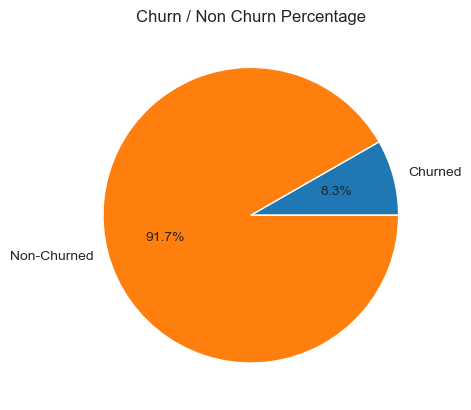

In [94]:
ax = plt.pie([churn_rate,non_churn_rate],autopct="%1.1f%%",labels=["Churned","Non-Churned"])
plt.title("Churn / Non Churn Percentage")
plt.show()

#### 91% of the customer do not churn, there is a possibility of class imbalance

#### Corelation Check: (drop highly +/-ve related columns, having corelation of >.85)

In [95]:
high_value_cust_data_corr = high_value_cust_data.corr()
high_value_cust_data_corr.loc[:,:] = np.tril(high_value_cust_data_corr, k=-1)
# high_value_cust_data_corr.head()
high_value_cust_data_corr = high_value_cust_data_corr.stack()
high_value_cust_data_corr
high_value_cust_data_corr = high_value_cust_data_corr[(high_value_cust_data_corr>0.80) | (high_value_cust_data_corr < -0.80)].sort_values(ascending=False)

In [96]:
high_value_cust_data_corr

total_rech_amt_8  arpu_8              0.958953
isd_og_mou_8      isd_og_mou_7        0.956817
isd_og_mou_7      isd_og_mou_6        0.936608
isd_og_mou_8      isd_og_mou_6        0.936012
total_ic_mou_6    loc_ic_mou_6        0.901584
total_ic_mou_8    loc_ic_mou_8        0.898079
total_ic_mou_7    loc_ic_mou_7        0.883200
std_og_t2t_mou_7  onnet_mou_7         0.861630
std_og_t2t_mou_6  onnet_mou_6         0.861095
std_og_t2t_mou_8  onnet_mou_8         0.858372
std_og_t2m_mou_7  offnet_mou_7        0.857629
std_og_t2m_mou_8  offnet_mou_8        0.853942
total_og_mou_7    std_og_mou_7        0.850066
total_og_mou_8    std_og_mou_8        0.849086
loc_ic_mou_6      loc_ic_t2m_mou_6    0.846379
loc_og_mou_8      loc_og_mou_7        0.845560
loc_ic_mou_8      loc_ic_mou_7        0.843853
std_ic_mou_8      std_ic_t2m_mou_8    0.838998
loc_ic_mou_8      loc_ic_t2m_mou_8    0.837391
loc_og_t2t_mou_8  loc_og_t2t_mou_7    0.835516
total_og_mou_6    std_og_mou_6        0.832305
loc_ic_mou_7 

In [97]:
# selecting the one of the columns from the pair of highly related columns

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    #print(corr_matrix.columns)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #print(i,j,corr_matrix.iloc[i,j],corr_matrix.iloc[i,j])
            if((corr_matrix.iloc[i,j]>=threshold) and (corr_matrix.columns[i] not in col_corr)):
                colname = corr_matrix.columns[i]
                #print(corr_matrix.columns[j],colname,col_corr)
                col_corr.add(colname)
    return col_corr

In [98]:
correlated_col = correlation(high_value_cust_data,.85)

#### drop high related columns (Corr >=.85)

In [99]:
print(correlated_col)

{'total_ic_mou_7', 'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'total_og_mou_7', 'total_ic_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'isd_og_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'std_og_t2m_mou_8'}


In [100]:
len(correlated_col)

12

In [101]:
del high_value_cust_data_corr

#### delete highly related columns: corelated_col

In [102]:
high_value_cust_data.drop(columns=correlated_col,inplace=True)

kaggle_test_data.drop(columns=correlated_col,inplace=True)

In [103]:
high_value_cust_data.shape

(21013, 116)

In [104]:
kaggle_test_data.shape

(30000, 115)

#### Derived Column: Tenure

In [105]:
high_value_cust_data['tenure'] = (high_value_cust_data['aon']/30)

kaggle_test_data['tenure'] = (kaggle_test_data['aon']/30)

#### Drop aon column

In [106]:
high_value_cust_data.drop(columns=['aon'],inplace=True)


kaggle_test_data.drop(columns=['aon'],inplace=True)

In [107]:
high_value_cust_data['tenure'].value_counts()

121.700000    308
79.066667     118
16.500000     85 
16.466667     63 
16.400000     57 
              .. 
86.800000     1  
46.466667     1  
92.433333     1  
112.666667    1  
90.000000     1  
Name: tenure, Length: 3139, dtype: int64

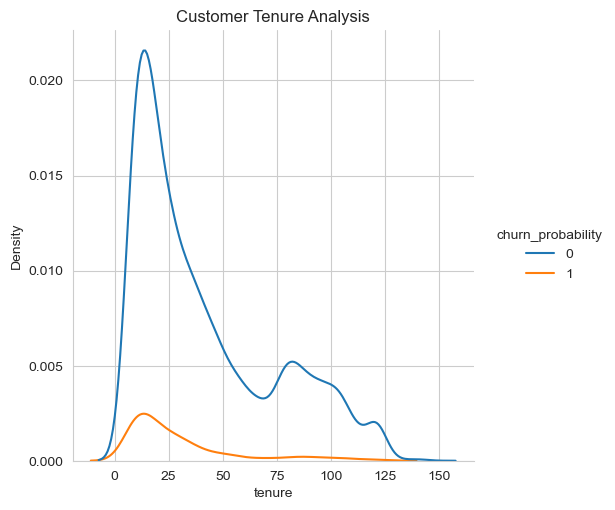

In [108]:
# tenure analysis

sns.displot(data = high_value_cust_data, x = 'tenure',hue='churn_probability',kind="kde")
plt.title("Customer Tenure Analysis")
plt.show()

#### Customer with low tenure has higher chances of churn

#### Derived Column: avg_arpu_6_7

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seprate averages, let's take an average to these two and drop the other columns.

In [110]:
high_value_cust_data['avg_arpu_6_7'] = (high_value_cust_data['arpu_6'] + high_value_cust_data['arpu_7'])/2

kaggle_test_data['avg_arpu_6_7'] = (kaggle_test_data['arpu_6'] + kaggle_test_data['arpu_7'])/2

#### Drop col: arpu_6, arpu_7

In [111]:
high_value_cust_data.drop(columns=['arpu_6', 'arpu_7'],inplace=True)

kaggle_test_data.drop(columns=['arpu_6', 'arpu_7'],inplace=True)

In [112]:
high_value_cust_data.shape

(21013, 115)

In [113]:
kaggle_test_data.shape

(30000, 114)

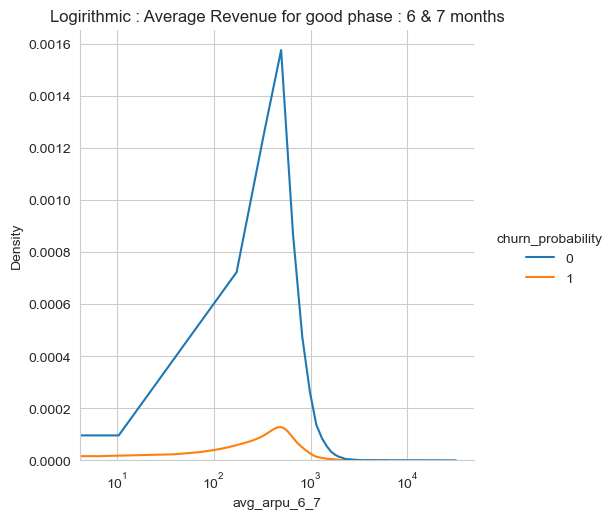

In [114]:
sns.displot(data = high_value_cust_data, x = 'avg_arpu_6_7',hue='churn_probability',kind="kde")
plt.title("Logirithmic : Average Revenue for good phase : 6 & 7 months")
plt.xscale('log')
plt.show()

#### Most customer belong to midrange

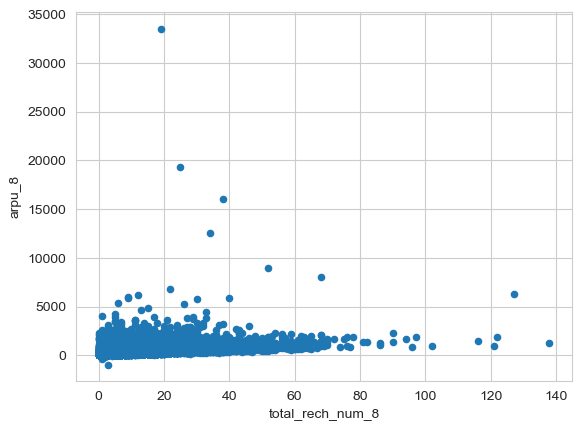

In [115]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
high_value_cust_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

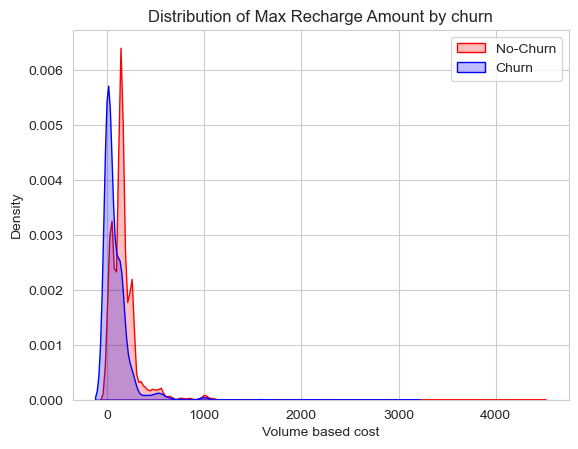

In [116]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(high_value_cust_data.max_rech_amt_8[(high_value_cust_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(high_value_cust_data.max_rech_amt_8[(high_value_cust_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

#### For churn customer max recharge amount is less than non churn customer

#### Combine the 6 & 7 month column

In [117]:
col_list = high_value_cust_data.columns[high_value_cust_data.columns.str.contains("_6|_7")]
col_list = list(col_list)
print(col_list)

['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_a

In [118]:
col_list.remove("avg_rech_amt_6_7")

In [119]:
col_list.remove("avg_arpu_6_7")

In [120]:
unq_col_list = []
for col in col_list:
    if col[:-2] not in unq_col_list:
        unq_col_list.append(col[:-2])

In [121]:
len(unq_col_list)

37

In [122]:
for col in unq_col_list:
    if col+"_6" in col_list and col+"_7" in col_list:
        new_col_name = 'avg_'+col+"_av67"
        col_6 = col+'_6'
        col_7 = col+'_7'
        high_value_cust_data[new_col_name] = (high_value_cust_data[col_6]+high_value_cust_data[col_7])/2
        high_value_cust_data.drop(columns=[col_6,col_7],inplace=True)
        
        kaggle_test_data[new_col_name] = (kaggle_test_data[col_6]+kaggle_test_data[col_7])/2
        kaggle_test_data.drop(columns=[col_6,col_7],inplace=True)

In [123]:
high_value_cust_data.shape

(21013, 81)

In [124]:
kaggle_test_data.shape

(30000, 80)

=============================================================================================================
<center><h1> Modelling</h1></center>
=============================================================================================================

In [125]:
high_value_cust_data.shape

(21013, 81)

### Train Test Data Split

In [126]:
#test data
y = high_value_cust_data.pop('churn_probability')

In [127]:
y.head()

4     0
15    0
23    0
24    0
27    0
Name: churn_probability, dtype: int64

In [128]:
#train data
X = high_value_cust_data

In [129]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_6,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_8,avg_rech_amt_6_7,tenure,avg_arpu_6_7,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_max_rech_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67
4,101.565,6.13,9.63,0.0,0.0,6.13,4.61,5.01,0.00,15.76,4.35,0.00,0.00,0.0,0.00,0.0,63.26,15.76,2.66,19.49,6.14,28.31,0.0,0.00,0.0,0.00,0.0,0.0,0.0,8.0,30.0,30.0,25.0,213.47,0.00,0.0,6.0,0.0,0.0,0.0,0.00,0.00,852.0,1494.0,21.566667,184.4495,13.055,47.550,26.82,7.865,7.495,28.310,6.610,4.925,42.425,0.0,2.175,8.500,0.00,3.415,7.455,4.570,15.450,0.0,0.000,0.000,0.000,0.000,0.0,0.000,11.5,45.5,17.5,33.0,349.845,0.00,0.0,6.5,0.0,0.5
15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,385.26,0.00,6.26,6.26,0.0,0.00,0.0,327.64,391.53,335.43,285.63,8.88,629.94,0.0,0.00,0.0,0.00,0.0,0.0,0.0,4.0,250.0,250.0,154.0,354.35,0.00,1.0,0.0,0.0,0.0,0.0,0.00,0.00,154.0,604.0,20.066667,478.9215,17.710,329.450,0.00,0.000,17.710,322.320,7.085,0.000,347.125,0.0,0.000,0.040,0.05,17.020,486.775,0.965,504.770,0.0,0.000,0.515,0.515,0.000,0.0,0.000,4.0,250.0,75.0,77.0,130.210,0.00,0.5,0.0,0.0,0.0
23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,387.79,202.08,0.00,0.00,0.0,0.01,0.0,1152.99,387.81,30.39,148.83,23.66,202.89,0.0,0.00,0.0,0.00,0.0,0.0,0.4,10.0,144.0,30.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1205.0,15.166667,1018.2270,616.120,371.785,0.00,0.000,616.120,252.210,18.505,0.000,886.845,0.0,101.040,0.025,0.00,175.455,201.135,43.195,419.795,0.0,103.515,0.000,103.515,0.065,0.0,0.075,22.5,110.0,80.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0
24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,129.73,371.89,0.00,121.79,0.0,0.36,0.0,624.38,251.89,19.14,150.73,1.13,171.01,0.0,21.93,0.0,21.93,0.0,0.0,0.0,10.0,30.0,30.0,23.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.00,0.00,23.0,491.0,40.633333,362.0215,65.735,519.475,0.00,0.000,65.735,189.365,0.000,0.000,255.110,0.0,330.100,0.000,0.00,45.165,138.660,0.765,184.600,0.0,8.250,0.000,8.250,0.000,0.0,0.000,7.0,110.0,55.0,23.0,0.020,0.00,0.0,1.5,0.0,0.0
27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,195.51,2.53,0.00,0.00,0.0,0.00,0.0,141.74,195.51,82.81,159.69,107.94,350.46,0.4,0.00,0.0,0.40,0.0,0.0,0.0,4.0,164.0,61.0,164.0,10.54,1342.93,0.0,1.0,1.0,1.0,700.4,185.71,173.72,642.0,1282.5,19.100000,370.7370,10.030,145.945,0.00,0.000,10.030,123.175,21.495,0.000,154.710,0.0,1.265,0.000,0.00,67.785,171.750,77.485,317.035,0.0,0.000,7.715,7.715,0.000,0.0,0.000,10.5,177.0,155.0,153.0,49.460,325.04,0.5,2.0,0.0,0.5


In [130]:
from sklearn.model_selection import train_test_split

### X_train,X_test,Y_train,Y_test

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=1)

In [132]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of y_train:", y_train.shape)
print("Dimension of X_test:", X_test.shape)
print("Dimension of y_test:", y_test.shape)

Dimension of X_train: (14709, 80)
Dimension of y_train: (14709,)
Dimension of X_test: (6304, 80)
Dimension of y_test: (6304,)


### Scaling: MinMaxScaler

##### Scaling Train Data: (fit_transform)

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
#select int / float columns
num_col = high_value_cust_data.select_dtypes(include=["int","float"]).columns

In [136]:
num_col

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_6',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_amt_data_8',
       'avg_rech_amt_6_7', 'tenure', 'avg_arpu_6_7', 'avg_onnet_mou_av67',
       'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_

In [137]:
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [138]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,14709.0,0.025062,0.015731,0.0,0.016879,0.022732,0.029468,1.0
onnet_mou_8,14709.0,0.021903,0.043653,0.0,0.001170,0.006195,0.022044,1.0
offnet_mou_8,14709.0,0.023991,0.033957,0.0,0.003804,0.013309,0.031165,1.0
roam_ic_mou_8,14709.0,0.002997,0.018747,0.0,0.000000,0.000000,0.000000,1.0
roam_og_mou_8,14709.0,0.005520,0.027848,0.0,0.000000,0.000000,0.000000,1.0
loc_og_t2t_mou_8,14709.0,0.007244,0.021140,0.0,0.000331,0.001988,0.006587,1.0
loc_og_t2m_mou_8,14709.0,0.042354,0.062833,0.0,0.004542,0.019483,0.054957,1.0
loc_og_t2f_mou_8,14709.0,0.009874,0.031478,0.0,0.000000,0.000045,0.006816,1.0
loc_og_t2c_mou_8,14709.0,0.004784,0.020307,0.0,0.000000,0.000000,0.000369,1.0
loc_og_mou_8,14709.0,0.021190,0.032224,0.0,0.002421,0.010184,0.027838,1.0


#### Scalling Test Data (transform)

In [139]:
X_test[num_col] = scaler.transform(X_test[num_col])

In [140]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,6304.0,0.025324,0.014397,-0.017725,0.017214,0.022969,0.029837,0.579574
onnet_mou_8,6304.0,0.022023,0.042058,0.000000,0.001256,0.006646,0.022935,0.927910
offnet_mou_8,6304.0,0.024545,0.033940,0.000000,0.003902,0.013474,0.031608,0.450506
roam_ic_mou_8,6304.0,0.002980,0.015206,0.000000,0.000000,0.000000,0.000000,0.302985
roam_og_mou_8,6304.0,0.005912,0.034332,0.000000,0.000000,0.000000,0.000000,1.527767
loc_og_t2t_mou_8,6304.0,0.007398,0.022431,0.000000,0.000333,0.002045,0.006985,0.907743
loc_og_t2m_mou_8,6304.0,0.043802,0.067254,0.000000,0.004645,0.020453,0.057894,1.398689
loc_og_t2f_mou_8,6304.0,0.010634,0.034211,0.000000,0.000000,0.000000,0.007241,0.980027
loc_og_t2c_mou_8,6304.0,0.005123,0.019459,0.000000,0.000000,0.000000,0.000369,0.484780
loc_og_mou_8,6304.0,0.021846,0.034207,0.000000,0.002492,0.010626,0.028662,0.923633


## -------------------------------------------------------SMOTE----------------------------------------

In [141]:
print("Before SMOTE : Dimension of X_train Shape:", X_train.shape)
print("Before SMOTE : Dimension of y_train Shape:", y_train.shape)

Before SMOTE : Dimension of X_train Shape: (14709, 80)
Before SMOTE : Dimension of y_train Shape: (14709,)


In [143]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)

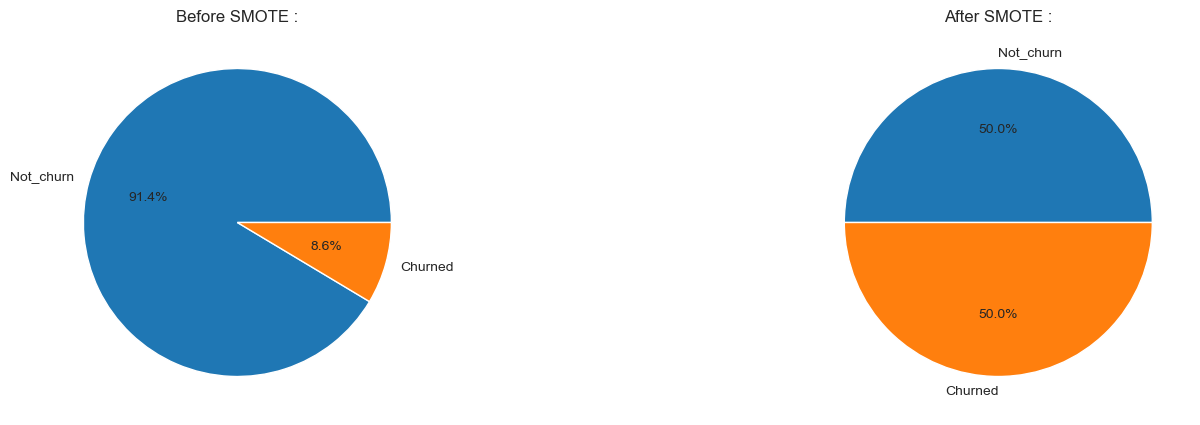

In [144]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
perc = y_train.value_counts()*100/len(y_train)
plt.pie(perc,autopct="%1.1f%%",labels=["Not_churn","Churned"])
plt.title("Before SMOTE :")
# plt.show()

plt.subplot(1,2,2)
perc = y_train_sm.value_counts()*100/len(y_train)
plt.pie(perc,autopct="%1.1f%%",labels=["Not_churn","Churned"])
plt.title("After SMOTE :")
plt.show()

#### After Applying smote, percentage of churn customer is now equal to non_churn, and now there is no imbalance in the Data

### ------------------------------------PCA: Principal Component Analysis---------------------------------

In [145]:
X_train_after_smothe = X_train_sm.copy()

In [146]:
y_train_after_smothe = y_train_sm.copy()

In [147]:
#import library
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [148]:
#applying PCA to find no of features
start_time=time.time()
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_train_after_smothe)
end_time = time.time()
print("Model Execution Time : %s seconds " % round(end_time - start_time,2))

Model Execution Time : 0.31 seconds 


In [149]:
#Y_test_after_PCA = pca.fit(X_test)

In [150]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)

array([27.3, 40.8, 48.2, 54.3, 59.5, 63.8, 67.8, 70.3, 72.6, 74.8, 76.7,
       78.4, 80. , 81.5, 82.9, 84.2, 85.4, 86.5, 87.4, 88.2, 89. , 89.6,
       90.2, 90.8, 91.4, 91.9, 92.4, 92.9, 93.4, 93.8, 94.2, 94.6, 95. ,
       95.3, 95.6, 95.9, 96.2, 96.5, 96.8, 97.1, 97.3, 97.5, 97.7, 97.9,
       98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1,
       99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7])

#### 90% of the data can be explained with 60 PCA components

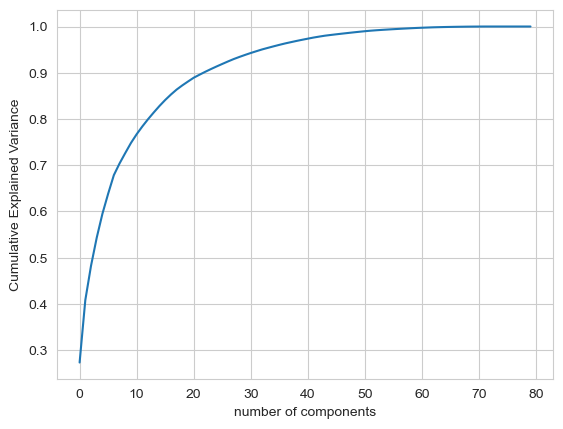

In [151]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cumsum)
plt.xlabel("number of components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [152]:
#Apply PCA
feature_number = 60
pca = IncrementalPCA(n_components = feature_number)
X_train_after_smothe_PCA = pca.fit_transform(X_train_after_smothe)
X_test_after_PCA = pca.transform(X_test)

In [153]:
kaggle_test_data_after_PCA = pca.transform(kaggle_test_data)

In [154]:
X_train_after_smothe_PCA.shape

(26892, 60)

In [155]:
kaggle_test_data_after_PCA.shape

(30000, 60)

In [156]:
X_test_after_PCA.shape

(6304, 60)

In [157]:
X_train_after_smothe_PCA[0]

array([ 0.22979685, -0.10713319,  0.04184805, -0.04669871, -0.0081834 ,
       -0.01257925, -0.00428705,  0.01751732,  0.02803626,  0.05383787,
       -0.02607388,  0.01582663,  0.09325696, -0.01075268,  0.06991334,
       -0.00612932, -0.0078932 ,  0.01079057, -0.00909379,  0.06713161,
        0.00144527,  0.05468523,  0.01017196, -0.00471847,  0.01104448,
       -0.00957282,  0.03366784,  0.02417514,  0.00551043,  0.00166746,
        0.05133767, -0.03952516,  0.043175  , -0.00594474, -0.00948139,
       -0.00578254,  0.00212482,  0.00147434, -0.00416287, -0.02614595,
        0.01554136, -0.03272775, -0.00118971, -0.00869335,  0.0145802 ,
        0.01259031, -0.00294172, -0.00835363, -0.00843098, -0.00183626,
        0.00665264,  0.00623912, -0.00084793,  0.00236346,  0.00159055,
        0.00320818,  0.00472077, -0.00272413, -0.00134161, -0.00501953])

In [158]:
col = list(X_train_after_smothe.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[3],'Feature':col})
df_pca

,PC1,PC2,PC3,Feature
0,0.010272,0.019814,0.010604,arpu_8
1,-0.001505,0.104346,0.029426,onnet_mou_8
2,0.011420,0.082842,0.036791,offnet_mou_8
3,-0.000001,0.002662,-0.016812,roam_ic_mou_8
4,-0.000463,0.017019,-0.028613,roam_og_mou_8
5,0.011167,0.014200,0.042196,loc_og_t2t_mou_8
6,0.073965,0.043893,0.234543,loc_og_t2m_mou_8
7,0.026228,-0.001001,0.022719,loc_og_t2f_mou_8
8,0.000100,0.006943,0.006260,loc_og_t2c_mou_8
9,0.036040,0.027880,0.117668,loc_og_mou_8


### Model Performance

In [159]:
from sklearn.model_selection import KFold,GridSearchCV

In [160]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
import itertools

def plot_confusion_matrix(cm):
    """
    Utitlity  Function to print Confusion Matrix
    """
    classes = [0,1]
    cmap = plt.cm.Blues
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


consolidated_model_summary = pd.DataFrame()
def get_model_performance(y_train, y_train_pred, y_test, y_test_pred , model_name):
    """
    Model Performance Stats
    """
    header(model_name+" : Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_test_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    train_accuracy = round(accuracy_score(y_train,y_train_pred),2)
    test_accuracy = round(accuracy_score(y_test,y_test_pred),2)
    recall = round(recall_score(y_test,y_test_pred),2)
    precision = round(precision_score(y_test,y_test_pred),2)
    auc = round(roc_auc_score(y_test,y_test_pred),2)
    f1 = round(f1_score(y_test,y_test_pred),2)
    
    data = [[model_name,train_accuracy,test_accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Train Accuracy','Test Accuracy','Precision','Recall','AUC','F1'])
    
    global consolidated_model_summary
    consolidated_model_summary = consolidated_model_summary.append(df,ignore_index=True)
    #print_matrix(consolidated_model_summary)
    #print(consolidated_model_summary)
    return consolidated_model_summary     

# def print_matrix(df):
    
#     cell_text = []
#     for row in range(len(df)):
#         print("row====", row)
#         print("row====", df.iloc[row])
#         cell_text.append(df.iloc[row])
     
#     print(cell_text)
#     plt.table(cell_text = [1,2], colLabels=['a','b'],loc="center")
#     plt.show()